ChEn-3170: Computational Methods in Chemical Engineering Spring 2020 UMass Lowell; Prof. V. F. de Almeida **05Apr20**

# Laboratory Work 10 (07Apr20)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `your name`

### Rubric for each assignment: 

|       Context         |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |
    

### <span style="color:red">Guidance:</span>
 +  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
    </span>
 +  <span style="color:red">
    Before submitting, `Kernel` -> `Restart & Run All`, to verify your notebook runs correctly.
    </span>
 +  <span style="color:red">
    Save your file again.
    </span>

## <span style="color:blue">Introduction</span>

<span style="color:blue">
Use the linear least-squares method to compute the best parameters, $\alpha$ and $\beta$, for the model
</span>

    
\begin{equation*}
\boxed{ y(t) = \beta\, e^{\alpha\,t} }
\end{equation*}
   

<span style="color:blue">
that approximates the given COVID-19 data $y(t)$.
</span>

---
### Table of Contents<a id="toc"></a>
* [Assignment 1 (20pts)](#a1) COVID-19 doubling period for death cases in **overall US**.
 - [1.1)](#a11) Write the growth rate for the model. Demonstrate the formula for the doubling period.
 - [1.2)](#a12) Calculate the optimal doubling period for the US death cases.
 - [1.3)](#a13) Verify how realistic the predictions of the doubling period are.
 - [1.4)](#a14) Compute and plot the variation of the doubling period in time.
 - [1.5)](#a15) Provide a technical summary to communicate your results.
* [Assignment 2 (20pts)](#a2) COVID-19 doubling period for confirmed cases in **overall US**.
 - [2.1)](#a21) Calculate the optimal doubling period for the US confirmed cases.
 - [2.2)](#a22) Verify how realistic the predictions of the doubling period are.
 - [2.3)](#a23) Compute and plot the variation of the doubling period in time.
 - [2.4)](#a24) Provide a technical summary to communicate your results.
* [Assignment 3 (20pts)](#a3) COVID-19 doubling period for death cases in **Massachusetts**.
 - [3.1)](#a31) Calculate the optimal doubling period for the death cases.
 - [3.2)](#a32) Verify how realistic the predictions of the doubling period are.
 - [3.3)](#a33) Compute and plot the variation of the doubling period in time.
 - [3.4)](#a34) Provide a technical summary to communicate your results.
* [Assignment 4 (20pts)](#a4) COVID-19 doubling period for death cases in individual US states/territories.
 - [4.1)](#a41) Compute the doubling period for all US states/territories with available data and produce a communication report.
* [Assignment 5 (20pts)](#a5) COVID-19 death distribution peak in China.
 - [5.1)](#a51) Use the linear least squares method with Fourier basis functions to approximate the COVID-19 death distribution in China.
 - [5.2)](#a52) Perform a modal analysis of the peak data.
---

## <span style="color:blue">Assignment 1 (20 pts): For each item below respond in a separate notebook cell.</span><a id="a1"></a>

[<span style="color:blue">1.1)</span>](#toc)
<span style="color:blue">
Write the growth rate for the model. Demonstrate the formula for the doubling period.
</span><a id="a11"></a>

The COVID-19 exponential *death* or *confirmed-case* function is given as follows:

\begin{equation*}
y(t) = \beta \, e^{\alpha\, t}.
\end{equation*}

The growth is the rate of change of $y$, hence:

\begin{equation*}
d_t\,y(t) = \beta \, \alpha \, e^{\alpha\, t} = \alpha\, y(t),
\end{equation*}

therefore, the growth rate is $\alpha$. The doubling period $T_2$ is found from $y(t+T_2) = 2\,y(t)$, which produces

\begin{equation*}
T_2 = \frac{\ln 2}{\alpha}.
\end{equation*}

[<span style="color:blue">1.2)</span>](#toc)
<span style="color:blue">
Calculate the optimal doubling period for the US death cases. Round up the result to the nearest natural number for the doubling period. Reproduce the results shown below. 
</span><a id="a12"></a>

In [1]:
'''1.2) Get data per state/territory in US'''

from chen_3170.help import get_covid_19_us_data

case_type = 'deaths'
(state_names, populations, dates, cases) = get_covid_19_us_data(type=case_type)

In [2]:
'''1.2) Combine the data into overall US data for times when cases are non-zero'''

import numpy as np
population = np.sum(populations)
us_cases = np.sum(cases,axis=1)
# select data with non-zero cases only
(nz_cases_ids,) = np.where(us_cases>0)
us_cases = us_cases[nz_cases_ids]
us_dates = dates[nz_cases_ids]

In [3]:
'''1.2) Select data up until a given date'''

#date = None # get all the data available
date = '4/6/20' # set end date wanted
if date is not None:
    assert isinstance(date,str)
    (id,) = np.where(us_dates==date)
    assert id.size == 1
    us_dates = np.copy(us_dates[:id[0]+1])
    us_cases = np.copy(us_cases[:id[0]+1])

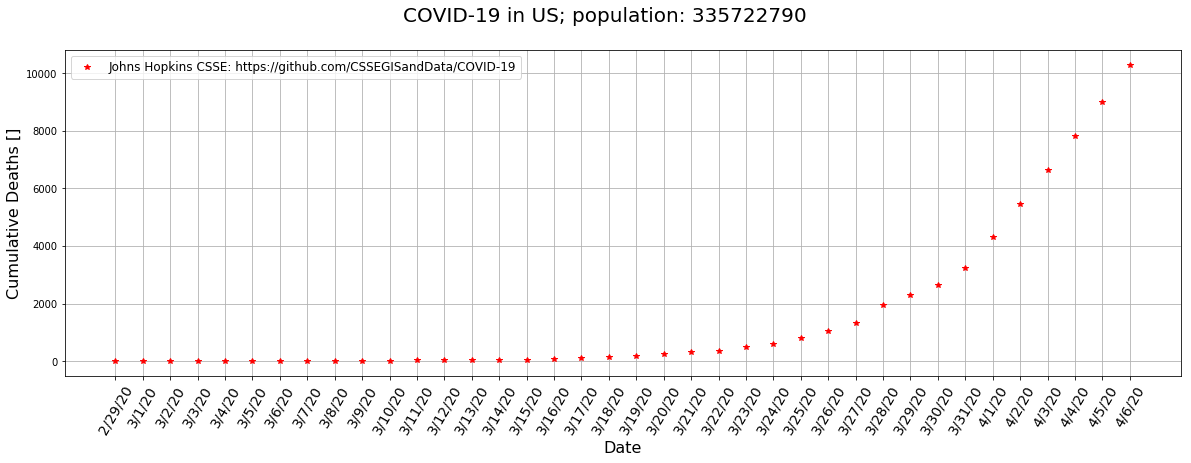

Last 5 days # of cumulative cases = [ 5472.  6650.  7810.  8991. 10288.]
Last 5 days # of added cases = [1178.0, 1160.0, 1181.0, 1297.0]


In [5]:
'''1.2) Plot data'''


In [6]:
'''1.2) Build linear system'''


In [7]:
'''1.2) Solve normal equations'''


Rank(A) = 2
||x_vec - x_vec NumPy|| = 1.666e-15
x_vec = [0.907 0.231]
beta   = 2.476e+00 []
alpha  = 2.311e-01 [1/day]
T2     =         3 [day]


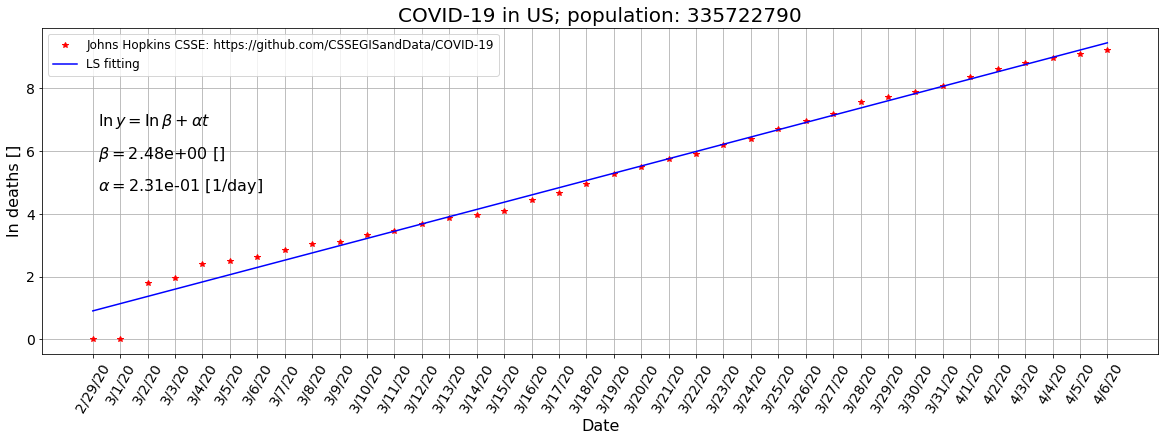

In [8]:
'''1.2) Plot fit in the transformed plane'''


In [9]:
'''1.2) Residual/error analysis'''


Mean(r_vec)      = 2.08021e-15
Mean(abs(r_vec)) = 1.91251e-01
std(abs(r_vec))  = 2.39632e-01

mean absolute error =  0.19 (min. val.= 0.00, max. val.= 9.24, ref.= 5.18)
mean relative error [%] =  4.52
std  relative error [%] =  6.49


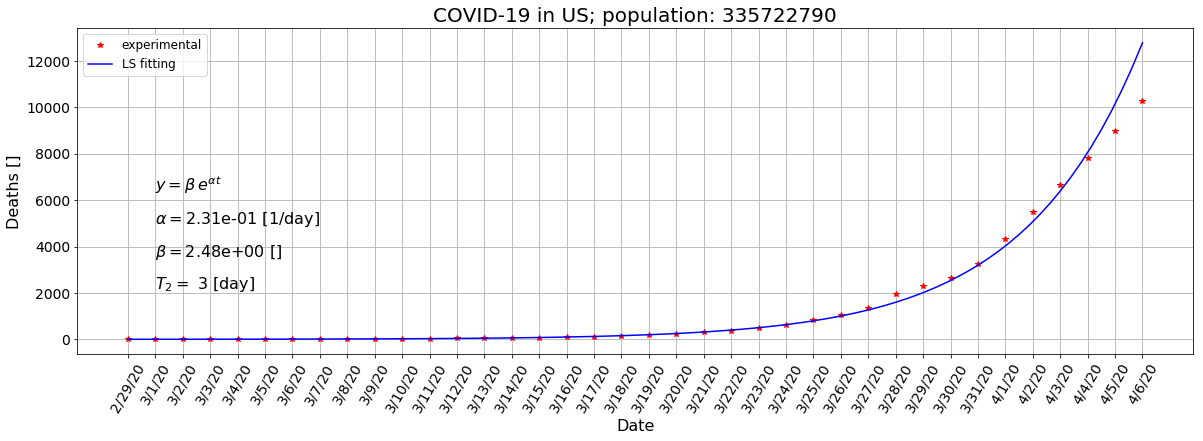

Last 5 days # of cumulative cases = [ 5472.  6650.  7810.  8991. 10288.]
Last 5 days # of added cases = [1178.0, 1160.0, 1181.0, 1297.0]


In [10]:
'''1.2) Plot fit in the Carteasian plane'''


In [11]:
'''1.2) Error analysis'''


mean relative error [%] = 22.19
std  relative error [%] = 39.52
discard dates with small number of cases: min(10,0.1*max(us_cases))
mean relative error [%] = 12.35
std  relative error [%] = 11.00


[<span style="color:blue">1.3)</span>](#toc)
<span style="color:blue">
Verify how realistic the predictions of the doubling period are. Based on your results, what do you conclude about the data?
</span><a id="a13"></a>

In [12]:
'''1.3) Verifying predictions of the doubling period'''


Rank(A) = 2
||x_vec - x_vec NumPy|| = 2.238e-16
x_vec = [0.885 0.233]
beta   = 2.423e+00 []
alpha  = 2.329e-01 [1/day]
T2     =         3 [day]

Predicted versus actual cases 7 days ago
Predicted # of cumulative cases after doubling period =  5318.0
Actual    # of cumulative cases                       =  5472.0
Prediction error [%] = -2.81

Rank(A) = 2
||x_vec - x_vec NumPy|| = 0.000e+00
x_vec = [0.887 0.233]
beta   = 2.427e+00 []
alpha  = 2.327e-01 [1/day]
T2     =         3 [day]

Predicted versus actual cases 6 days ago
Predicted # of cumulative cases after doubling period =  6456.0
Actual    # of cumulative cases                       =  6650.0
Prediction error [%] = -2.92

Rank(A) = 2
||x_vec - x_vec NumPy|| = 4.441e-16
x_vec = [0.885 0.233]
beta   = 2.422e+00 []
alpha  = 2.329e-01 [1/day]
T2     =         3 [day]

Predicted versus actual cases 5 days ago
Predicted # of cumulative cases after doubling period =  8610.0
Actual    # of cumulative cases                       =  7810.

**Explain results and conclude:** 

[<span style="color:blue">1.4)</span>](#toc) 
<span style="color:blue">
Compute the daily variation of the doubling period with time. Make a plot and explain the significance of this result.
</span><a id="a14"></a>

In [13]:
'''1.4) Compute the daily history of the doubling period'''


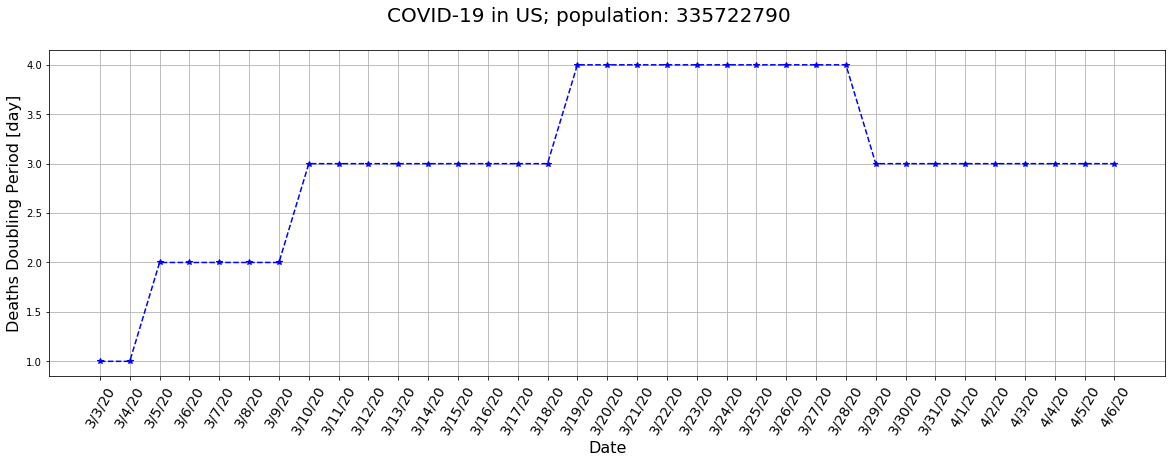

**Significance of the doubling period variation with time:**

[<span style="color:blue">1.5)</span>](#toc) 
<span style="color:blue">
Technical summary for communicating your results.
</span><a id="a15"></a>

In [15]:
'''1.5) Technical summary communicating results'''


***************************************************************************
                           COVID-19 Trend                                  
             Computed doubling period of deaths cases for US                   
***************************************************************************
UMass Lowell ChEn-3170 Computational Methods in Chem. Eng. https://github.com/dpploy/chen-3170
Data source: Johns Hopkins CSSE: https://github.com/CSSEGISandData/COVID-19

                         Today is 11-Apr-2020

US: after  3 [days], expected new deaths =  10288, rate(100k) = 6.1

Starting date: 3/17/20
T2 [day] = [3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Last 5 days # of cumulative cases = [ 5472.  6650.  7810.  8991. 10288.]
Last 5 days # of added cases = [1178.0, 1160.0, 1181.0, 1297.0]

For reference:
US 2018 death rate(100k) influenza/pneumonia: 14.9 https://www.cdc.gov/nchs/products/databriefs/db355.htm
US 2018 (leading) death rate(100k) heart disea

## <span style="color:blue">Assignment 2 (20 pts): For each item below respond in a separate notebook cell.</span> <a id="a2"></a>

[<span style="color:blue">2.1)</span>](#toc)
<span style="color:blue">
Calculate the optimal doubling period for the US death cases. Round up the result to the nearest natural number for the doubling period. Reproduce the results shown below. 
</span><a id="a21"></a>

In [16]:
'''2.1) Get data per state/territory in US'''

case_type = 'confirmed'
(state_names, populations, dates, cases) = get_covid_19_us_data(type=case_type)

In [17]:
'''2.1) Combine the data into overall US data for times when cases are non-zero'''

population = np.sum(populations)
us_cases = np.sum(cases,axis=1)
# select data with non-zero cases only
(nz_cases_ids,) = np.where(us_cases>0)
us_cases = us_cases[nz_cases_ids]
us_dates = dates[nz_cases_ids]

In [18]:
'''2.1) Select data up until a given date'''

if date is not None:
    assert isinstance(date,str)
    (id,) = np.where(us_dates==date)
    assert id.size == 1
    us_dates = np.copy(us_dates[:id[0]+1])
    us_cases = np.copy(us_cases[:id[0]+1])

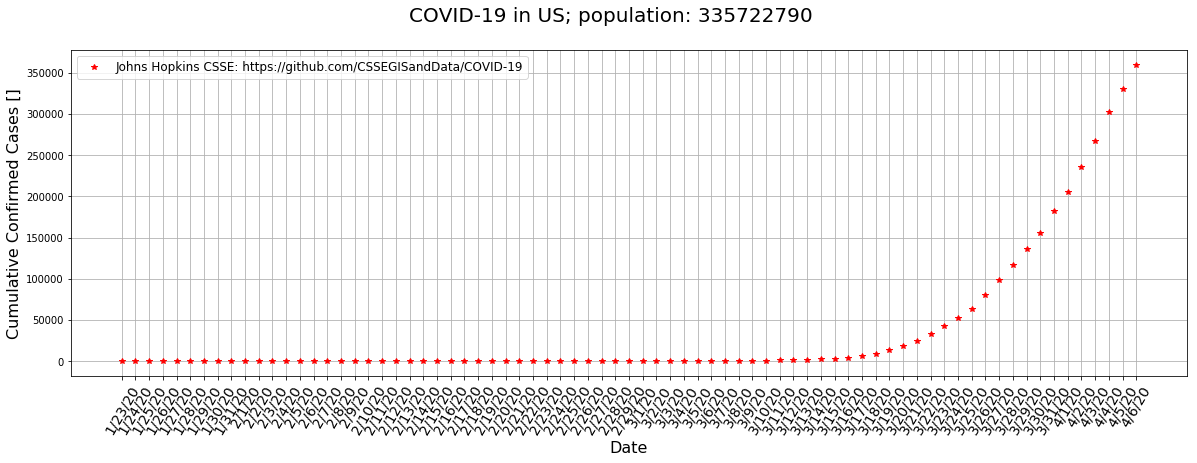

Last 5 days # of cumulative cases = [235889. 267531. 302066. 330115. 359473.]
Last 5 days # of added cases = [31642.0, 34535.0, 28049.0, 29358.0]


In [19]:
'''2.1) Plot data'''


In [20]:
'''2.1) Build linear system'''


In [21]:
'''2.1) Solve normal equations'''


Rank(A) = 2
||x_vec - x_vec NumPy|| = 1.333e-15
x_vec = [-0.845  0.174]
beta   = 4.293e-01 []
alpha  = 1.737e-01 [1/day]
T2     =         4 [day]


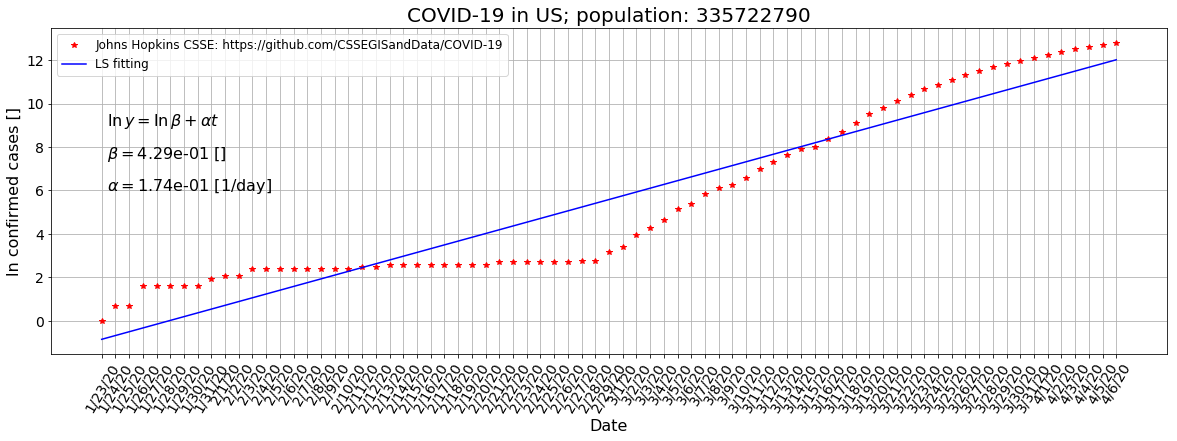

In [22]:
'''2.1) Plot fit in the transformed plane'''


In [23]:
'''2.1) Residual/error analysis'''


Mean(r_vec)      = -3.49350e-16
Mean(abs(r_vec)) = 1.09670e+00
std(abs(r_vec))  = 6.18420e-01

mean absolute error =  1.10 (min. val.= 0.00, max. val.=12.79, ref.= 5.58)
mean relative error [%] = 37.16
std  relative error [%] = 39.63


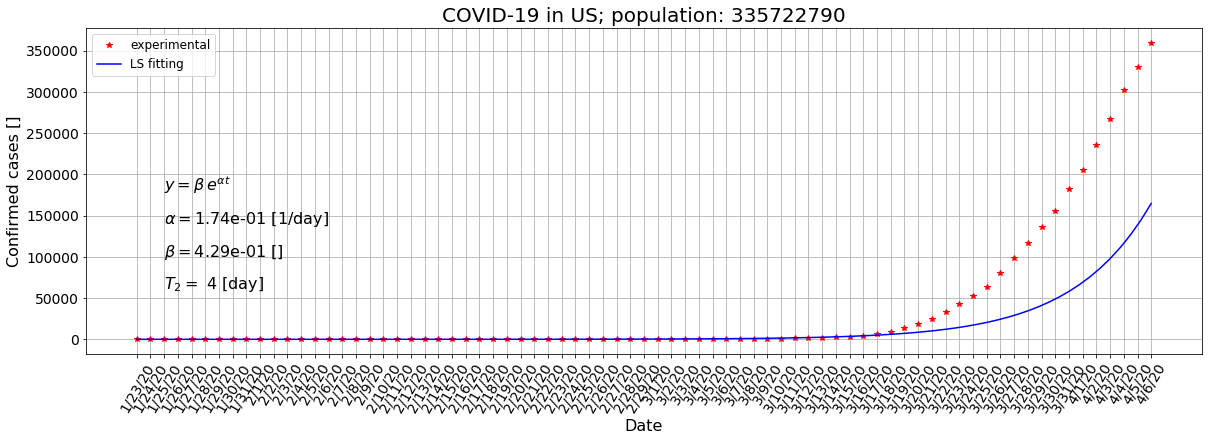

Last 5 days # of cumulative cases = [235889. 267531. 302066. 330115. 359473.]
Last 5 days # of added cases = [31642.0, 34535.0, 28049.0, 29358.0]


In [24]:
'''2.1) Plot fit in the Carteasian plane'''


In [25]:
'''2.1) Error analysis'''


mean relative error [%] = 192.96
std  relative error [%] = 281.27
discard dates with small number of cases: min(10,0.1*max(us_cases))
mean relative error [%] = 213.39
std  relative error [%] = 299.76


[<span style="color:blue">2.2)</span>](#toc)
<span style="color:blue">
Verify how realistic the predictions of the doubling period are. Based on your results, what do you conclude about the data?
</span><a id="a22"></a>

In [26]:
'''2.2) Verifying predictions of the doubling period'''


Rank(A) = 2
||x_vec - x_vec NumPy|| = 1.888e-15
x_vec = [-0.618  0.164]
beta   = 5.389e-01 []
alpha  = 1.639e-01 [1/day]
T2     =         5 [day]

Predicted versus actual cases 7 days ago
Predicted # of cumulative cases after doubling period =  310706.0
Actual    # of cumulative cases                       =  302066.0
Prediction error [%] = 2.86

Rank(A) = 2
||x_vec - x_vec NumPy|| = 2.221e-15
x_vec = [-0.662  0.166]
beta   = 5.158e-01 []
alpha  = 1.659e-01 [1/day]
T2     =         5 [day]

Predicted versus actual cases 6 days ago
Predicted # of cumulative cases after doubling period =  364368.0
Actual    # of cumulative cases                       =  330115.0
Prediction error [%] = 10.38

Rank(A) = 2
||x_vec - x_vec NumPy|| = 1.666e-15
x_vec = [-0.702  0.168]
beta   = 4.957e-01 []
alpha  = 1.677e-01 [1/day]
T2     =         5 [day]

Predicted versus actual cases 5 days ago
Predicted # of cumulative cases after doubling period =  411630.0
Actual    # of cumulative cases                

**Explain results and conclude:**

[<span style="color:blue">2.3)</span>](#toc)
<span style="color:blue">
Compute the daily variation of the doubling period with time. Make a plot and explain the significance of this result.
</span><a id="a23"></a>

In [27]:
'''2.3) Compute the daily history of the doubling period'''


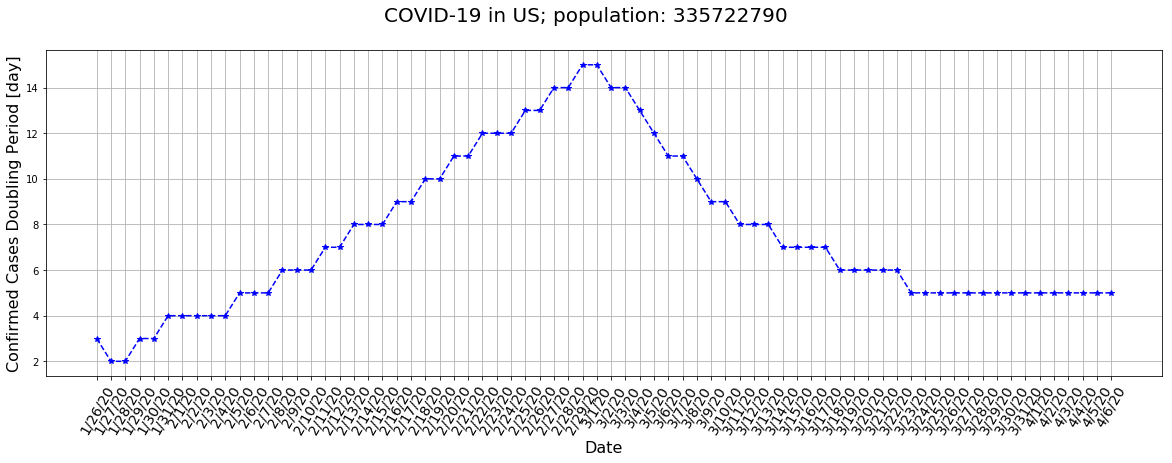

[<span style="color:blue">
2.4)</span>](#toc)
<span style="color:blue">
Technical summary for communicating your results.
</span><a id="a24"></a>

***************************************************************************
                           COVID-19 Trend                                  
             Computed doubling period of confirmed cases for US                   
***************************************************************************
UMass Lowell ChEn-3170 Computational Methods in Chem. Eng. https://github.com/dpploy/chen-3170
Data source: Johns Hopkins CSSE: https://github.com/CSSEGISandData/COVID-19

                         Today is 11-Apr-2020

US: after  5 [days], expected new confirmed cases = 359473, rate(100k) = 214.1

Starting date: 3/17/20
T2 [day] = [7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

Last 5 days # of cumulative cases = [235889. 267531. 302066. 330115. 359473.]
Last 5 days # of added cases = [31642.0, 34535.0, 28049.0, 29358.0]



## <span style="color:blue">Assignment 3 (20 pts): For each item below respond in a separate notebook cell.</span><a id="a3"></a>

[<span style="color:blue">3.1)</span>](#toc)
<span style="color:blue">
Calculate the optimal doubling period for Massachusetts death cases. Round up the result to the nearest natural number for the doubling period. Reproduce the results shown below. 
</span><a id="a31"></a>

In [30]:
'''3.1) Get data per state/territory in US'''

from chen_3170.help import get_covid_19_us_data

case_type = 'deaths'
(state_names, populations, dates, cases) = get_covid_19_us_data(type=case_type)

In [31]:
'''3.1) Get Massachusetts data for times when cases are non-zero'''

import numpy as np

state = 'Massachusetts'
assert state in state_names, 'State: %r not in %r'%(state,state_names)
state_id = state_names.index(state)
population = populations[state_id]
(nz_cases_ids,) = np.where(cases[:,state_id]>0)
state_cases = cases[nz_cases_ids,state_id]
state_dates = dates[nz_cases_ids]

In [32]:
'''3.1) Select data up until a given date'''

if date is not None:
    assert isinstance(date,str)
    (id,) = np.where(state_dates==date)
    assert id.size == 1
    state_dates = np.copy(state_dates[:id[0]+1])
    state_cases = np.copy(state_cases[:id[0]+1])

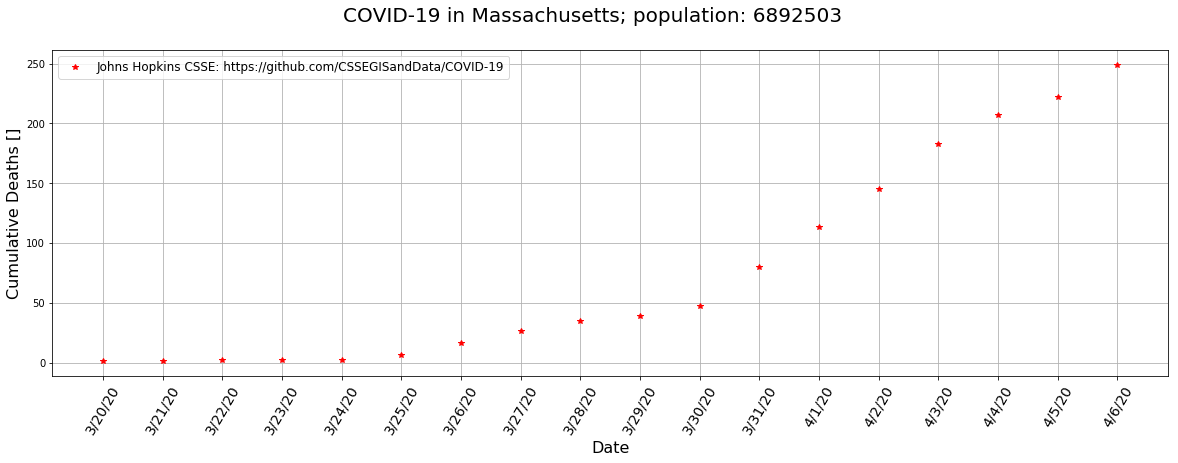

Last 5 days # of cumulative cases = [145. 183. 207. 222. 249.]
Last 5 days # of added cases = [38.0, 24.0, 15.0, 27.0]


In [33]:
'''3.1) Plot data'''


In [34]:
'''3.1) Build linear system'''


In [35]:
'''3.1) Solve normal equations'''


Rank(A) = 2
||x_vec - x_vec NumPy|| = 3.053e-16
x_vec = [0.036 0.365]
beta   = 1.037e+00 []
alpha  = 3.652e-01 [1/day]
T2     =         2 [day]


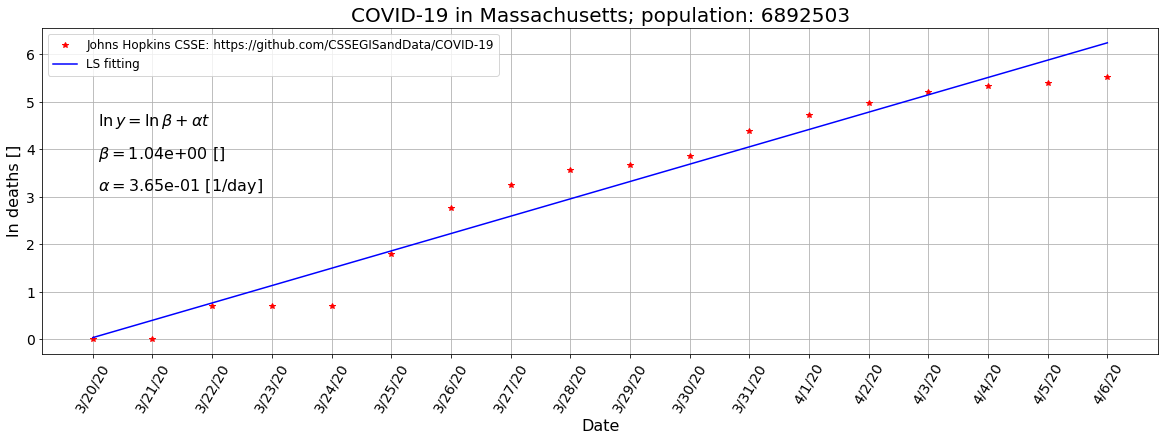

In [36]:
'''3.1) Plot fit in the transformed plane'''


In [37]:
'''3.1) Residual/error analysis'''


Mean(r_vec)      = -5.18104e-16
Mean(abs(r_vec)) = 3.56185e-01
std(abs(r_vec))  = 2.35740e-01

mean absolute error =  0.36 (min. val.= 0.00, max. val.= 5.52, ref.= 3.14)
mean relative error [%] = 19.28
std  relative error [%] = 28.70


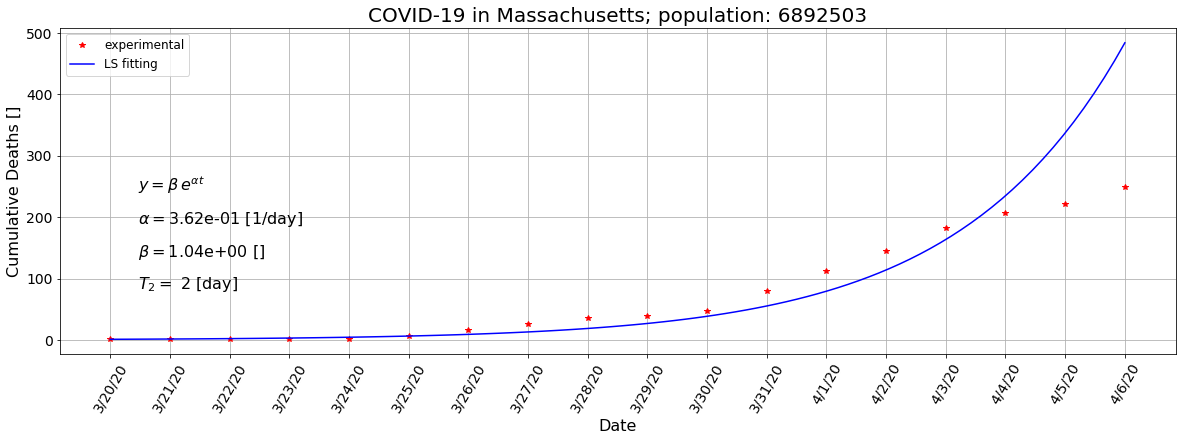

Last 5 days # of cumulative cases = [145. 183. 207. 222. 249.]
Last 5 days # of added cases = [38.0, 24.0, 15.0, 27.0]


In [38]:
'''3.1) Plot fit in the Carteasian plane'''


In [39]:
'''3.1) Error analysis'''


mean relative error [%] = 38.42
std  relative error [%] = 32.32
discard dates with small number of cases: min(10,0.1*max(us_cases))
mean relative error [%] = 37.11
std  relative error [%] = 25.90


[<span style="color:blue">3.2)</span>](#toc) 
<span style="color:blue">
Verify how realistic the predictions of the doubling period are. Based on your results, what do you conclude about the data?
</span><a id="a32"></a>

In [40]:
'''3.2) Verifying predictions of the doubling period'''


Rank(A) = 2
||x_vec - x_vec NumPy|| = 7.301e-16
x_vec = [-0.353  0.452]
beta   = 7.028e-01 []
alpha  = 4.518e-01 [1/day]
T2     =         2 [day]

Predicted versus actual cases 7 days ago
Predicted # of cumulative cases after doubling period =  94.0
Actual    # of cumulative cases                       =  113.0
Prediction error [%] = -16.81

Rank(A) = 2
||x_vec - x_vec NumPy|| = 1.110e-16
x_vec = [-0.323  0.443]
beta   = 7.243e-01 []
alpha  = 4.428e-01 [1/day]
T2     =         2 [day]

Predicted versus actual cases 6 days ago
Predicted # of cumulative cases after doubling period =  160.0
Actual    # of cumulative cases                       =  145.0
Prediction error [%] = 10.34

Rank(A) = 2
||x_vec - x_vec NumPy|| = 2.289e-16
x_vec = [-0.291  0.434]
beta   = 7.478e-01 []
alpha  = 4.341e-01 [1/day]
T2     =         2 [day]

Predicted versus actual cases 5 days ago
Predicted # of cumulative cases after doubling period =  226.0
Actual    # of cumulative cases                       =  183.

**Explain results and conclude:**

[<span style="color:blue">3.3)</span>](#toc)
<span style="color:blue">
Compute the daily variation of the doubling period with time. Make a plot and explain the significance of this result.
</span><a id="a33"></a>

In [41]:
'''3.3) Compute the daily history of the doubling period'''


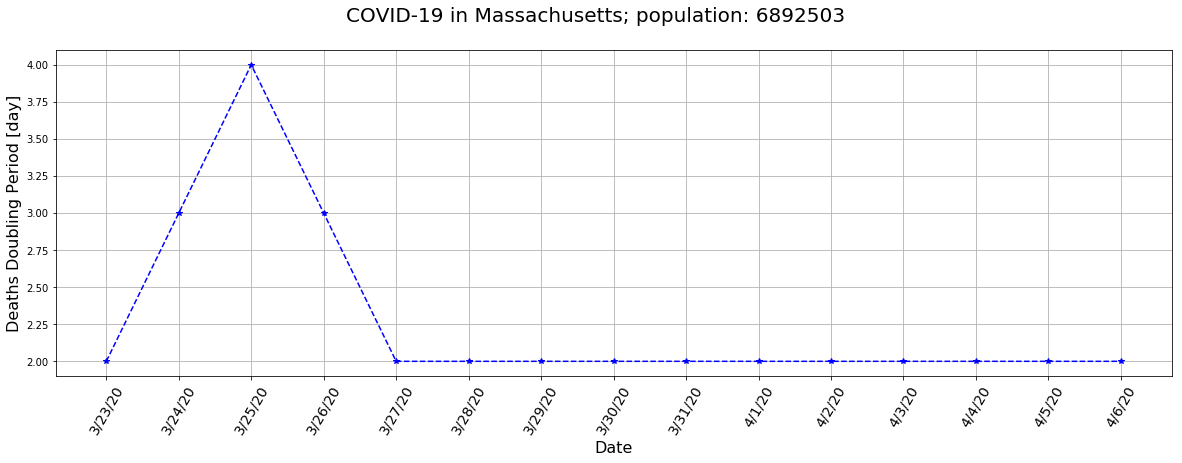

**Significance of the doubling period variation with time:**

[<span style="color:blue">3.4)</span>](#toc)
<span style="color:blue">
Technical summary for communicating your results.
</span><a id="a34"></a>

In [43]:
'''3.4) Technical summary communicating results'''


***************************************************************************
                           COVID-19 Trend                                  
             Computed doubling period of deaths cases for US                   
***************************************************************************
UMass Lowell ChEn-3170 Computational Methods in Chem. Eng. https://github.com/dpploy/chen-3170
Data source: Johns Hopkins CSSE: https://github.com/CSSEGISandData/COVID-19

                         Today is 11-Apr-2020

Massachusetts: after  2 [days], expected new deaths =    249, rate(100k) = 7.2

Starting date: 3/24/20
T2 [day] = [3, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Last 5 days # of cumulative cases = [145. 183. 207. 222. 249.]
Last 5 days # of added cases = [38.0, 24.0, 15.0, 27.0]

For reference:
US 2018 death rate(100k) influenza/pneumonia: 14.9 https://www.cdc.gov/nchs/products/databriefs/db355.htm
US 2018 (leading) death rate(100k) heart disease: 163.6 https://www.cdc.go

## <span style="color:blue">Assignment 4 (20 pts): For each item below respond in a separate notebook cell.</span><a id="a4"></a>

[<span style="color:blue">4.1)</span>](#toc)
<span style="color:blue">
Compute the doubling period for all US states/territories with available data and produce a communication report as follows:
</span><a id="a41"></a>

In [44]:
'''4.1) Compute doubling period and report'''


***************************************************************************
                           COVID-19 Trend                                  
     Computed doubling period of deaths cases per US states and territories      
********************************(******************************************
UMass Lowell ChEn-3170 Computational Methods in Chem. Eng. https://github.com/dpploy/chen-3170
Data source: Johns Hopkins CSSE: https://github.com/CSSEGISandData/COVID-19

                         Today is 11-Apr-2020

                 Alabama: after  3 [days], expected new deaths =     92, rate(100k) = 3.8
                  Alaska: after  5 [days], expected new deaths =      5, rate(100k) = 1.4
                 Arizona: after  4 [days], expected new deaths =     79, rate(100k) = 2.2
                Arkansas: after  4 [days], expected new deaths =     25, rate(100k) = 1.7
              California: after  4 [days], expected new deaths =    605, rate(100k) = 3.1
                Color

## <span style="color:blue">Assignment 5 (20 pts): For each item below respond in a separate notebook cell.</span><a id="a5"></a>

[<span style="color:blue">5.1)</span>](#toc)
<span style="color:blue">
Use the linear least squares method with Fourier basis functions to approximate the COVID-19 death distribution in China.
</span><a id="a51"></a>

In [45]:
'''5.1) Get data per country'''

from chen_3170.help import get_covid_19_global_data

case_type = 'deaths'
(country_names, dates, cases) = get_covid_19_global_data(type=case_type)

In [46]:
'''5.1) Get China data for times when cases are non-zero'''

import numpy as np

country = 'China'
assert country in country_names, 'State: %r not in %r'%(country,country_names)
country_id = country_names.index(country)
(nz_cases_ids,) = np.where(cases[:,country_id]>0)
country_cases = cases[nz_cases_ids,country_id]
country_dates = dates[nz_cases_ids]

In [47]:
'''5.1) Select data up until a given date'''

if date is not None:
    assert isinstance(date,str)
    (id,) = np.where(country_dates==date)
    assert id.size == 1
    country_dates = np.copy(country_dates[:id[0]+1])
    country_cases = np.copy(country_cases[:id[0]+1])

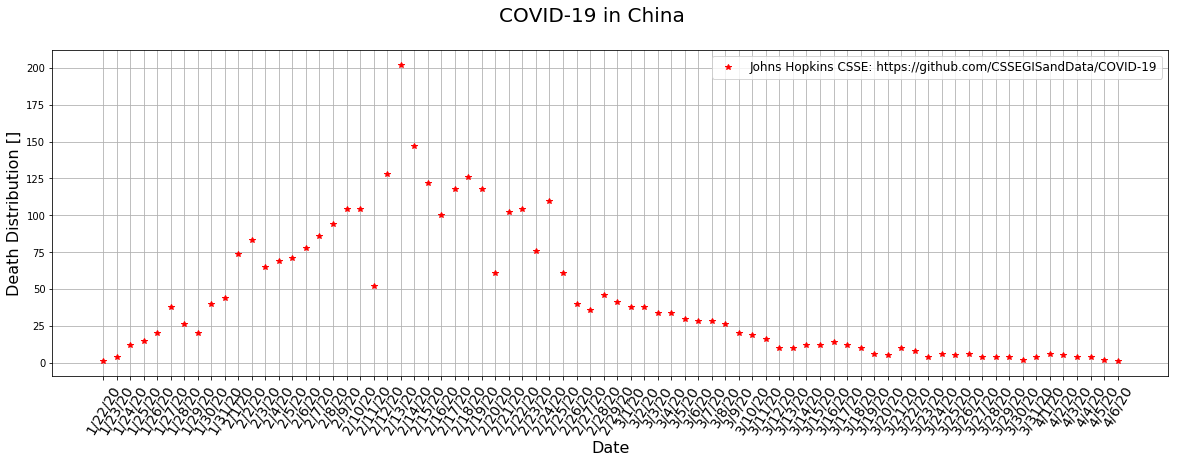

Last 5 days # of added cases = [5. 4. 4. 2. 1.]


In [48]:
'''5.1 Plot data'''


In [49]:
'''5.1) Build the matrix system'''


My rank(A) = 41
NumPy rank(A) = 41


In [50]:
'''5.1) Solve the normal equations for the Fourier amplitudes'''


x_vec = [ 43.671 -21.975  49.306 -17.569 -10.569   4.793  -2.505  -3.238   3.71
  -2.355  -2.448  -0.61   -2.967   4.78    1.367  -3.445   3.769  -1.736
  -2.626   1.481   2.554  -2.73    0.59   -3.591  -0.718   0.37   -5.867
   7.193   1.512  -3.864   4.102  -1.183  -4.76    4.702   1.093  -0.877
   4.613  -4.605  -1.211   2.075  -3.675]
||x_vec - NumPy x_vec|| = 1.401e-14


In [51]:
'''5.1) Function: plot the LS Fourier fit and all modes'''


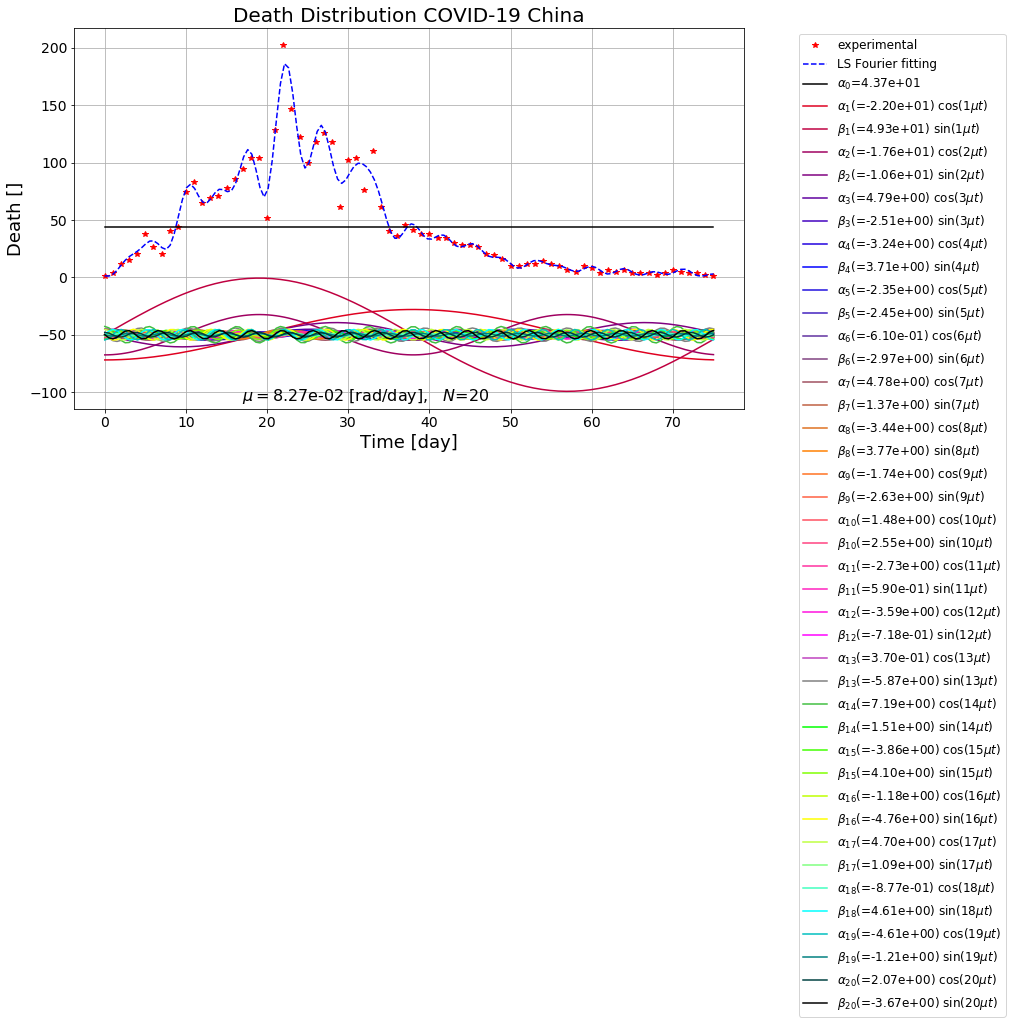

In [52]:
'''5.1) Plot the LS Fourier fit'''


[<span style="color:blue">5.2)</span>](#toc)
<span style="color:blue">
Perform a modal analysis of the peak data.
</span><a id="a52"></a>

In [53]:
'''5.2) Function: plot the power spectrum (Fourier transform)'''


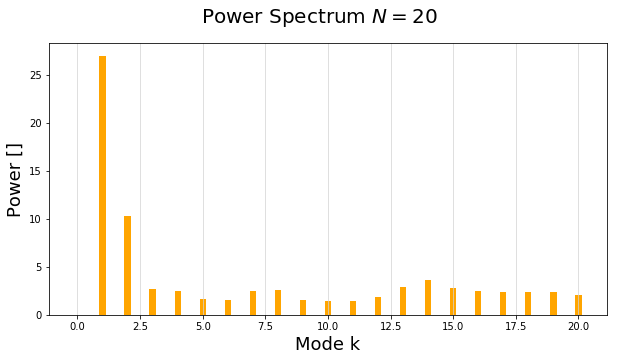

**Modal analysis:**